<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Импортируем библиотеку `pandas`, прочитаем файл `real_estate_data.csv` и посмотрим первые строки таблицы `df`.

In [1]:
import pandas as pd
df = pd.read_csv('real_estate_data.csv')
df.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Очевидно, что это произошло из-за использования `\t` в качестве разделителя, вместо запятой. Ещё раз прочитаем файл `real_estate_data.csv` указав `\t` в качестве разделителя и снова посмотрим первые строки таблицы `df`.

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Проблема решилась, но теперь при выводе данных отображаются только 20 из 22 столбцов. Конечно можно прочитать их отдельно `df[['studio', 'open_plan']].head()`, но так как в дальнейшем планируется добавлять новые столбцы и неоднократно придётся выводить данные, то лучше снять ограничения на количество выводимых столбцов используя метод `set_option()`.

In [3]:
# Сброс ограничений на число выводимых столбцов
pd.set_option('display.max_columns', None)

Посмотрим первые и последние 10 строк таблицы `df`.

In [4]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
df.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим общую информацию о данных в таблице `df`.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посмотрим названия колонок таблицы `df`.

In [7]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В названиях колонок `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` наблюдается смешение стилей `CamelCase` и `snake_case`. Приведём все названия к единому стилю `snake_case`.

In [8]:
df = df.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest',
        'parks_around3000': 'parks_around_3000',
        'ponds_around3000': 'ponds_around_3000'
    }
)

Ещё раз посмотрим названия колонок таблицы `df` и опишем данные в каждом столбце.

In [9]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Описание данных в столбцах:
+ `total_images` — число фотографий квартиры в объявлении
+ `last_price` — цена на момент снятия с публикации (рублей)
+ `total_area` — площадь квартиры в квадратных метрах (м²)
+ `first_day_exposition` — дата публикации
+ `rooms` — число комнат
+ `ceiling_height` — высота потолков (м)
+ `floors_total` — всего этажей в доме
+ `living_area` — жилая площадь в квадратных метрах (м²)
+ `floor` — этаж
+ `is_apartment` — апартаменты (булев тип)
+ `studio` — квартира-студия (булев тип)
+ `open_plan` — свободная планировка (булев тип)
+ `kitchen_area` — площадь кухни в квадратных метрах (м²)
+ `balcony` — число балконов
+ `locality_name` — название населённого пункта
+ `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
+ `city_centers_nearest` — расстояние до центра города (м)
+ `parks_around_3000` — число парков в радиусе 3 км
+ `parks_nearest` — расстояние до ближайшего парка (м)
+ `ponds_around_3000` — число водоёмов в радиусе 3 км
+ `ponds_nearest` — расстояние до ближайшего водоёма (м)
+ `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

### Вывод

1. Мы работаем с таблицей размером 23699 строк на 22 столбца.
2. Количество значений в столбцах различается. Значит в данных есть пропущенные значения.
3. Столбец `last_price` можно привести из типа `float` к типу `int`, так как после запятой идут уже копейки.
4. Столбец `first_day_exposition` нужно привести из типа `object` к типу `datetime`.
5. В столбце `is_apartment` заполнено всего 12% ячеек, также этот столбец нужно привести из типа `object` к типу `bool`.
6. Столбцы `airports_nearest`, `city_centers_nearest`, `parks_nearest` и `ponds_nearest` можно привести из типа `float` к типу `int`, так как после запятой идут уже сантиметры.
7. Столбцы `floors_total`, `balcony`, `parks_around_3000`, `ponds_around_3000` и `days_exposition` нужно привести из типа `float` к типу `int`, так как значения этих столбцов измеряются только целым числом.

## Предобработка данных

### Заполнение пропусков

Посчитаем количество пропущенных значений в таблице `df`.

In [10]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски есть в 14 столбцах из 22 и их количество составляет 19,5% от общего объёма данных. Разберём отдельно каждый из 14 столбцов.

+ **Рассмотрим столбец** `ceiling_height`

В данном столбце не заполнено 38,8% ячеек. Скорее всего пользователи, просто не заполняли данный раздел при публикации объявления. Но пропуски в высоте потолков можно считать критичными, так как данный параметр должен влиять на стоимость квартиры. Мы можем определить зависимость высоты потолков от стоимости 1 м² и заполнить пропуски на основании этих данных. Разобьём все квартиры на 4 группы по стоимости за 1 м²: `дешевле 100.000`, `от 100.000 до 150.000`, `от 150.000 до 200.000` и `свыше 200.000`. Потом найдём медианное значение высоты потолка для каждой группы и заполним пропуски столбца `ceiling_height` на основании полученных значений. Но предварительно взглянем на среднеарифметическое, медиану, минимум и максимум столбца `ceiling_height`.

In [11]:
df['ceiling_height'].mean(), df['ceiling_height'].median(), df['ceiling_height'].min(), df['ceiling_height'].max()

(2.7714988968559835, 2.65, 1.0, 100.0)

Cреднеарифметическое и медиана очень близки другу к дургу по значениям, но так как наблюдаются аномальные выбросы в виде высоты потолков в 1 и 100 метров, то для заполнения пропусков всё-таки лучше подойдёт медиана. Теперь найдём медианное значение высоты потолка для каждой из четырёх групп.

In [12]:
row_1 = (df['last_price']/df['total_area'])<=100000
row_2 = ((df['last_price']/df['total_area'])>100000) & ((df['last_price']/df['total_area'])<=150000)
row_3 = ((df['last_price']/df['total_area'])>150000) & ((df['last_price']/df['total_area'])<=200000)
row_4 = (df['last_price']/df['total_area'])>200000
[
df.loc[row_1, 'ceiling_height'].median(),
df.loc[row_2, 'ceiling_height'].median(),
df.loc[row_3, 'ceiling_height'].median(),
df.loc[row_4, 'ceiling_height'].median()
]

[2.6, 2.7, 3.0, 3.06]

Наблюдается отчётливая зависимость. Высота потолков увеличивается с ростом стоимости за 1 м². Заполним пропуски в столбце `ceiling_height` согласно этой градации.

In [13]:
df.loc[row_1, 'ceiling_height'] = df.loc[row_1, 'ceiling_height'].fillna(2.6)
df.loc[row_2, 'ceiling_height'] = df.loc[row_2, 'ceiling_height'].fillna(2.7)
df.loc[row_3, 'ceiling_height'] = df.loc[row_3, 'ceiling_height'].fillna(3.0)
df.loc[row_4, 'ceiling_height'] = df.loc[row_4, 'ceiling_height'].fillna(3.06)

+ **Рассмотрим столбец** `floors_total`

Количество пропусков в столбце `floors_total` очень мало и сами пропуски абсолютно не критичны. Взглянем на среднеарифметическое, медиану, минимум и максимум этого столбца.

In [14]:
df['floors_total'].mean(), df['floors_total'].median(), df['floors_total'].min(), df['floors_total'].max()

(10.67382374115953, 9.0, 1.0, 60.0)

Cреднеарифметическое и медиана очень близки другу к дургу по значениям, но наблюдается значительный выброс в виде 60 этажа, поэтому для заполнения пропусков лучше использовать медиану. Но так как этаж квартиры может оказаться больше медианы, то используем медиану для тех пропусков, где этаж квартиры меньше или равен 9 этажу. Остальные пропуски заполним значением `df['floor']+1`, то есть будем брать на этаж выше текущего, так как даже миниальное увеличение квартир находящихся на последнем этаже может исказить данные, в связи с тем, что квартир на первом и последнем этажах должно быть значительно меньше, чем всех остальных.

In [15]:
df.loc[df['floor']<=9, 'floors_total'] = df.loc[df['floor']<=9, 'floors_total'].fillna(9.0)

In [16]:
df.loc[df['floor']>9, 'floors_total'] = df.loc[df['floor']>9, 'floors_total'].fillna(df['floor']+1)

+ **Рассмотрим столбцы** `living_area` и `kitchen_area`

В столбце `living_area` всего 8% пропусков, а в столбце `kitchen_area` всего 9,6% пропусков и они заполнены значениями `NaN`. Причиной пропусков может быть то, что это квартиры без отделки и без межкомнатных перегородок. Жилая площадь и площадь кухни не интересны нам в чистом виде. В дальнейшем нам будет интересно их соотношение с общей площадью. Поскольку в столбце с общей площадью нет пропусков и со значением `NaN` можно производить арифметические операции, то оставим пропуски столбцов `living_area` и `kitchen_area` без изменений, а уже после добавления в таблицу двух новых столбцов с соотношением их площади к общей, заполним пропуски этих новых столбцов их медианным значением.

+ **Рассмотрим столбец** `is_apartment`

В столбце `is_apartment` 88,3% пропусков. Самая очевидная причина — это то, что недвижимость не является апартаментами. Поэтому просто заполним все пропуски значением `False`. Также так как в столбце могут храниться данные только одного типа, то все значения автоматически приведутся из типа `object` к типу `bool`.

In [17]:
df['is_apartment'] = df['is_apartment'].fillna(False)

+ **Рассмотрим столбец** `balcony`

В столбце `balcony` 48,6% пропусков. Самая очевидная причина — это отсутствие балкона, поэтому просто заполним все пропуски нулями.

In [18]:
df['balcony'] = df['balcony'].fillna(0)

+ **Рассмотрим столбец** `locality_name`

В столбце `locality_name` всего лишь 0,2% пропусков. Возможная причина — названия некоторых населённых пунктов просто отсутствуют в вариантах выбора для пользователя. Заполним все пропуски значением `unknown`. Но сперва, так как столбец `locality_name` хранит категориальные значения, убедимся в отсутствии скрытых пропусков, например значения `'None'` записанного в виде строки.

In [19]:
# Выведем таблицу df отфильтрованную по возможным скрытым пропускам
len(df.loc[df['locality_name'].isin(['None', 'NaN', 'Null', 'unknown', '0', '-'])])

0

Скрытых пропусков нет. Теперь можем заполнить все пропуски значением `unknown`.

In [20]:
df['locality_name'] = df['locality_name'].fillna('unknown')

+ **Рассмотрим столбцы** `airports_nearest`, `city_centers_nearest`, `parks_nearest` и `ponds_nearest`

Количество пропусков в данных столбцах следующее: `airports_nearest - 23,4%`, `city_centers_nearest - 23,3%`, `parks_nearest - 65,9%`, `ponds_nearest - 61,6%`. Можно предположить, что пользователи просто не заполняли данные разделы, но в описании проекта говорится, что такие значения как расстояние до центра, аэропорта, ближайшего парка и водоёма получены автоматически на основе картографических данных. То есть система скорее всего имеет адрес квартиры и на его основе автоматически заполняет эти столбцы. Тогда можно предположить, что пользователь неккоректно заполнил адрес, но тогда например в столбцах `parks_nearest` и `parks_around_3000` должно быть одинаковое количество пропусков, а по факту у них трёхкратная разница. С другой стороны, неизвестно как заполняется столбец `parks_around_3000` автоматически или пользователем. Оставим пропуски столбцов `airports_nearest`, `city_centers_nearest`, `parks_nearest` и `ponds_nearest` без изменений. Также тогда мы не сможем привести их из типа `float` к типу `int`, но это никак не повлияет на наше исследование.

+ **Рассмотрим столбцы** `parks_around_3000` и `ponds_around_3000`

В столбцах `parks_around_3000` и `ponds_around_3000` по 23,3% пропусков. Отсутствие значений может говорить об отсутствии парка или водоёма в радиусе 3 км. Также во время обзора данных было видно, что некоторые ячейки в этих столбцах заполнены значением ноль, что тоже говорит об отсутствии парка или водоёма в радиусе 3 км. Приведём всё к единому стилю и заполним все пропуски нулями.

In [21]:
df['parks_around_3000'] = df['parks_around_3000'].fillna(0)
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0)

+ **Рассмотрим столбец** `days_exposition`

В столбце `days_exposition` 13,4% пропусков. Взглянем на среднеарифметическое, медиану, минимум и максимум этого столбца.

In [22]:
df['days_exposition'].mean(), df['days_exposition'].median(), df['days_exposition'].min(), df['days_exposition'].max()

(180.88863436982163, 95.0, 1.0, 1580.0)

Наблюдаются значительные выбросы и как следствие почти двухкратная разница между медианой и среднеарифметическим. Оставим пропуски пока как есть.

+ **Ещё раз проверим количество пропусков таблицы** `df` **после всех изменений.**

In [23]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Изменение типов данных

Ещё раз проговорим в каких столбцах и почему будем изменять типы данных:
+ Столбец `first_day_exposition` из типа `object` к типу `datetime`, так как это дата публикации объявления.
+ Столбец `last_price` из типа `float` к типу `int`, так как после запятой идут уже копейки.
+ Столбцы `floors_total`, `balcony`, `parks_around_3000` и `ponds_around_3000` из типа `float` к типу `int`, так как значения этих столбцов измеряются только целым числом.

Теперь проведём изменение типов данных методами `astype()` и `to_datetime()`.

In [24]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df = df.astype({
    'last_price': 'int',
    'floors_total': 'int',
    'balcony': 'int',
    'parks_around_3000': 'int',
    'ponds_around_3000': 'int',
})

Проверим типы данных после сделанных изменений.

In [25]:
df.dtypes

total_images                     int64
last_price                       int32
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                int32
parks_nearest                  float64
ponds_around_3000                int32
ponds_nearest                  float64
days_exposition                float64
dtype: object

## Расчёты и добавление результатов в таблицу

+ Добавим в исходную таблицу `df` столбец `price_square_meter`, в котором будет храниться цена за 1 м². Для удобства чтения будем хранить стоимость в тысячах рублей и округлим её до 1 знака после запятой. Остальные знаки после запятой имеют сверхмалое влияние на общую стоимость.

In [26]:
df['price_square_meter'] = ((df['last_price']/df['total_area'])/1000).round(1)

+ Добавим в исходную таблицу `df` столбцы `day`, `month` и `year`, в которых будут хранится день недели, месяц и год публикации объявления соответственно.

In [27]:
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

+ Добавим в исходную таблицу `df` столбец `flats_floor`, в котором будет храниться этаж квартиры, обозначенный одним из трёх значений: `первый`, `последний` или `другой`.

In [28]:
def add_flats_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
df['flats_floor'] = df.apply(add_flats_floor, axis=1)

+ Добавим в исходную таблицу `df` столбцы `ratio_living_to_total_area` и `ratio_kitchen_to_total_area` в которых будут храниться соотношения `жилая площадь/общая площадь` и `площадь кухни/общая площадь`. Также в разделе по заполнению пропусков мы хотели заполнить пропуски этих новых столбцов их медианой. Сделаем это.

In [29]:
df['ratio_living_to_total_area'] = df['living_area']/df['total_area']
df['ratio_living_to_total_area'] = df['ratio_living_to_total_area'].fillna(df['ratio_living_to_total_area'].median())
df['ratio_kitchen_to_total_area'] = df['kitchen_area']/df['total_area']
df['ratio_kitchen_to_total_area'] = df['ratio_kitchen_to_total_area'].fillna(df['ratio_kitchen_to_total_area'].median())

+ **Выведем первые и последние 10 строк таблицы** `df` **после всех изменений.**

In [30]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,day,month,year,flats_floor,ratio_living_to_total_area,ratio_kitchen_to_total_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120.4,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.60,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82.9,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92.8,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,3.06,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408.2,4,7,2015,другой,0.567860,0.172414
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100.0,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95.1,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.60,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99.2,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.70,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110.5,3,4,2019,другой,0.567860,0.263966
8,20,2900000,33.16,2018-05-23,1,2.60,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87.5,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88.5,6,2,2017,другой,0.714754,0.106557


In [31]:
df.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,day,month,year,flats_floor,ratio_living_to_total_area,ratio_kitchen_to_total_area
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1,353.0,2,652.0,29.0,100.6,2,2,2018,другой,0.461756,0.257790
23690,3,5500000,52.00,2018-07-19,2,2.70,5,31.0,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,NaN,15.0,105.8,3,7,2018,другой,0.596154,0.115385
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0,NaN,1,806.0,519.0,129.9,3,10,2016,другой,0.552812,0.145405
23692,2,1350000,30.00,2017-07-07,1,2.60,5,17.5,4,False,False,False,6.00,0,Тихвин,NaN,NaN,0,NaN,0,NaN,413.0,45.0,4,7,2017,другой,0.583333,0.200000
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,False,False,False,8.00,0,Петергоф,45602.0,34104.0,1,352.0,1,675.0,239.0,73.7,4,8,2016,другой,0.641026,0.128205
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72.5,1,3,2017,другой,0.547792,0.103356
23695,14,3100000,59.00,2018-01-15,3,2.60,5,38.0,4,False,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52.5,0,1,2018,другой,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,2.60,3,29.7,1,False,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44.1,6,2,2018,первый,0.523810,0.172414
23697,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,149.5,1,3,2017,другой,0.567860,0.303583
23698,4,1350000,32.30,2017-07-21,1,2.50,5,12.3,1,False,False,False,9.00,0,поселок Новый Учхоз,NaN,NaN,0,NaN,0,NaN,NaN,41.8,4,7,2017,первый,0.380805,0.278638


## Исследовательский анализ данных

+ **Изучим площадь объектов недвижимости.** Построим гистограммы и используем метод `describe()` для столбцов `total_area`, `ratio_living_to_total_area` и `ratio_kitchen_to_total_area`

In [32]:
[
    'Общая площадь',
    df['total_area'].describe(),
    'Отношение жилой площади к общей',
    df['ratio_living_to_total_area'].describe(),
    'Отношение площади кухни к общей',
    df['ratio_kitchen_to_total_area'].describe(),
]

['Общая площадь',
 count    23699.000000
 mean        60.348651
 std         35.654083
 min         12.000000
 25%         40.000000
 50%         52.000000
 75%         69.900000
 max        900.000000
 Name: total_area, dtype: float64,
 'Отношение жилой площади к общей',
 count    23699.000000
 mean         0.565014
 std          0.101053
 min          0.021583
 25%          0.500000
 50%          0.567860
 75%          0.631579
 max          1.000000
 Name: ratio_living_to_total_area, dtype: float64,
 'Отношение площади кухни к общей',
 count    23699.000000
 mean         0.185919
 std          0.069512
 min          0.025381
 25%          0.136859
 50%          0.172414
 75%          0.223717
 max          0.787879
 Name: ratio_kitchen_to_total_area, dtype: float64]

<AxesSubplot:>

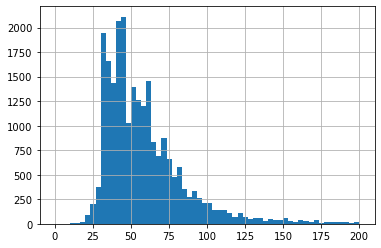

In [33]:
df['total_area'].hist(bins=60, range = (0, 200))

<AxesSubplot:>

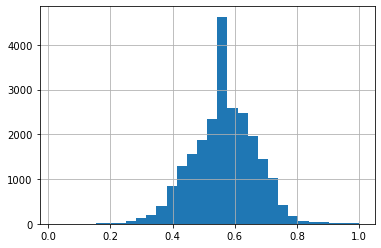

In [34]:
df['ratio_living_to_total_area'].hist(bins=30)

<AxesSubplot:>

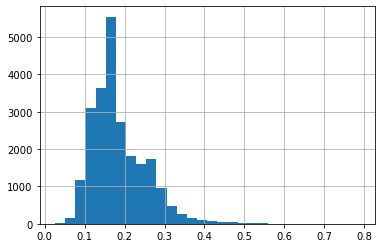

In [35]:
df['ratio_kitchen_to_total_area'].hist(bins=30)

Отношение жилой площади к общей имеет нормальное распределение. А гистограммы общей площади и отношения площади кухни к общей схожи друг с другом и имеют форму распределения Пуассона. Минимальное значение площади в 12 м² кажется выбросом, но теоретически это может быть супер малая квартира-студия. А вот максимальная площадь в 900 м² уже точно похожа на выброс. Построим укрупнённую гистограмму для столбца `total_area` в диапазоне от 200 до 1000.

<AxesSubplot:>

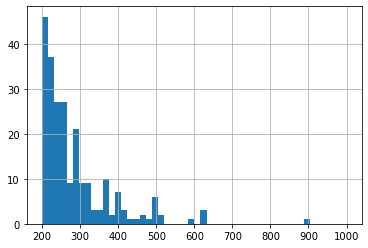

In [36]:
df['total_area'].hist(bins=50, range=(200, 1000))

Предположим, что квартиры до 400 м² это какая-нибудь супер элитная недвижимость с 16 комнатами по 25 м² например на Крестовском острове. Посмотрим сколько квартир площадью более 400 м².

In [37]:
len(df.loc[df['total_area']>=400])

26

Таких квартир оказалось всего 0,11%. Удалим эти строки как редкие и выбивающиеся значения.

In [38]:
df = df.query('total_area<400')

+ **Изучим стоимость 1 м² объектов недвижимости.** Построим гистограмму и используем метод `describe()` для столбца `price_square_meter`

In [39]:
df['price_square_meter'].describe()

count    23673.000000
mean        99.198019
std         48.236204
min          0.100000
25%         76.600000
50%         95.000000
75%        114.200000
max       1736.800000
Name: price_square_meter, dtype: float64

<AxesSubplot:>

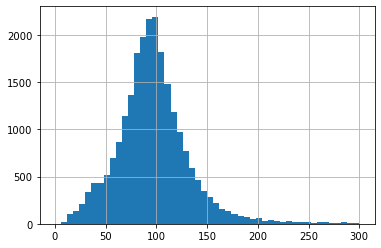

In [40]:
df['price_square_meter'].hist(bins=50, range=(0, 300))

Гистограмма стоимости за 1 м² имеет нормальное распределение. Построим дополнительно две гистограммы для диапазона от 0 до 50 и для диапазона от 300 до 1800.

<AxesSubplot:>

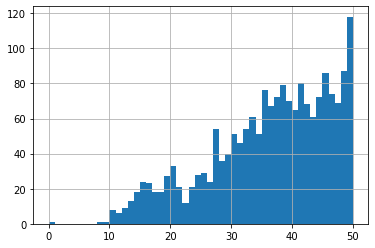

In [41]:
df['price_square_meter'].hist(bins=50, range=(0, 50))

<AxesSubplot:>

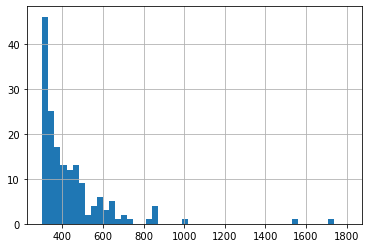

In [42]:
df['price_square_meter'].hist(bins=50, range=(300, 1800))

Объекты недвижимости со стоимостью за 1 м² в диапазоне от 0 до 10 и от 400 до 1800 кажутся редкими и выбивающимися значениями. Удалим их.

In [43]:
df = df.query('price_square_meter>10 and price_square_meter<400')

+ **Изучим полную стоимость объектов недвижимости.** Построим гистограмму и используем метод `describe()` для столбца `last_price`

In [44]:
df['last_price'].describe()

count    2.359700e+04
mean     6.117951e+06
std      5.779845e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      1.310000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

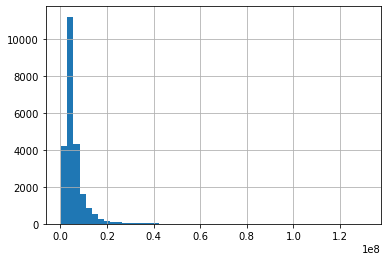

In [45]:
df['last_price'].hist(bins=50)

Построим дополнительные гистограммы для диапазона от 0 до 20 и от 20 до 135 миллионов рублей

<AxesSubplot:>

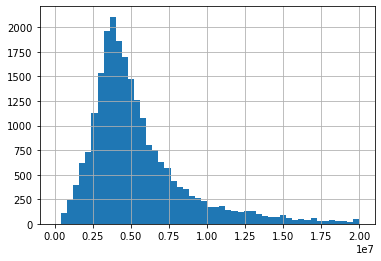

In [46]:
df['last_price'].hist(bins=50, range=(0, 20000000))

Гистограмма тяготеет к форме нормального распределения.

<AxesSubplot:>

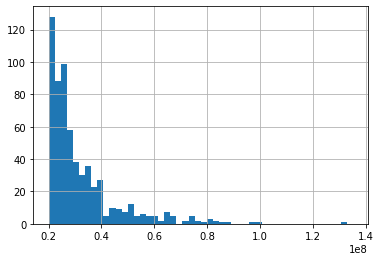

In [47]:
df['last_price'].hist(bins=50, range=(20000000, 135000000))

Большинство квартир находятся в ценовом диапазоне от 2,5 до 6,5 миллионов рублей. Стоимости свыше 40 миллионов рублей кажутся редкими и выбивающимися. Удалим их.

In [48]:
df = df.query('last_price<40000000')

+ **Изучим количество комнат объектов недвижимости.** Построим гистограмму и используем метод `describe()` для столбца `rooms`

In [49]:
df['rooms'].describe()

count    23485.000000
mean         2.050884
std          1.047261
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

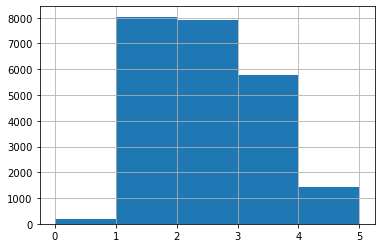

In [50]:
df['rooms'].hist(bins=5, range=(0, 5))

Максимальное значение в 19 комнат ещё можно соотнести с квартирами под 400 м², которые мы оставили в предыдущем пункте. Но квартиры с нулевым значением комнат тоно являются выбросами. Удалим их.

In [51]:
df = df.query('rooms>0')

+ **Изучим высоту потолков объектов недвижимости.** Построим гистограмму и используем метод `describe()` для столбца `ceiling_height`

In [52]:
df['ceiling_height'].describe()

count    23289.000000
mean         2.716469
std          0.748504
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

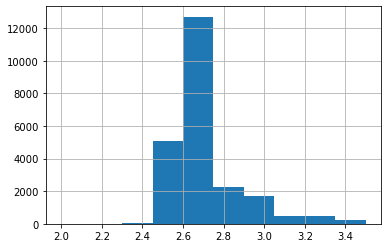

In [53]:
df['ceiling_height'].hist(range=(2, 3.5))

В Санкт-Петербурге бывают квартиры с потолками до 5 метров. Отсечём все значения потолков менее 2  и более 5 метров как редкие и выбивающимися.

In [54]:
df = df.query('ceiling_height>2 and ceiling_height<=5')

Посмотрим на сколько сократился исходный массив после всех чисток.

In [55]:
23699-len(df)

453

Ушло 453 строки. Это составляет 1,9% от общего объёма данных, что вполне допустимо.

+ **Изучим время продажи объектов недвижимости.** Построим гистограмму и используем метод `describe()` для столбца `days_exposition`

In [56]:
df['days_exposition'].describe()

count    20141.000000
mean       180.542823
std        219.318007
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

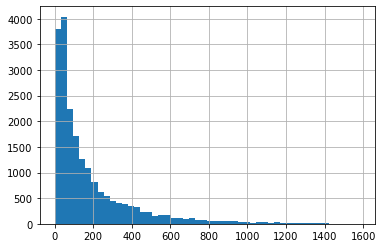

In [57]:
df['days_exposition'].hist(bins=50)

Построим отдельную гистограмму для диапазона от 0 до 365 дней.

<AxesSubplot:>

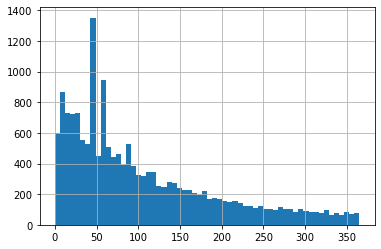

In [58]:
df['days_exposition'].hist(bins=60, range=(0, 365))

Наблюдается сильный пик в районе 95 дней, что коррелирует с медианным значением. Таким образом делаем вывод, что среднее время продажи - 95 дней, если ушло меньше, то продажу можно считать быстрой, а если больше, то долгой. Также если на продажу ушло более 365 дней, то такие продажи считаем необычайно долгими.

+ **Изучим зависимость цены 1 м² от площади.** Построим три диаграммы рассеяния для столбцов `price_square_meter` и `total_area`, `price_square_meter` и  `ratio_living_to_total_area`, `price_square_meter` и  `ratio_kitchen_to_total_area`. Найдём коэффициенты корреляции Пирсона.

<AxesSubplot:xlabel='price_square_meter', ylabel='ratio_kitchen_to_total_area'>

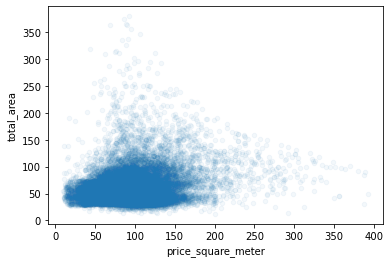

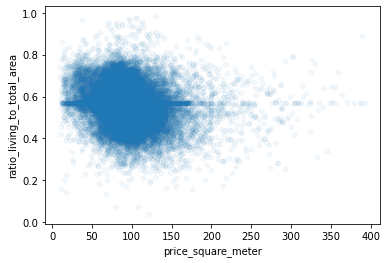

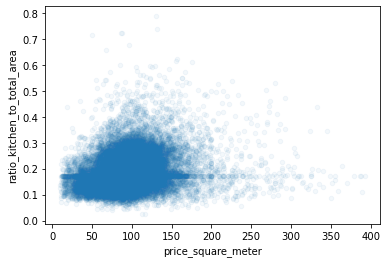

In [59]:
df.plot(x='price_square_meter', y='total_area', kind='scatter', alpha=0.05)
df.plot(x='price_square_meter', y='ratio_living_to_total_area', kind='scatter', alpha=0.05)
df.plot(x='price_square_meter', y='ratio_kitchen_to_total_area', kind='scatter', alpha=0.05)

In [60]:
[
    df['price_square_meter'].corr(df['total_area']),
    df['price_square_meter'].corr(df['ratio_living_to_total_area']),
    df['price_square_meter'].corr(df['ratio_kitchen_to_total_area'])
]

[0.17228178030754202, -0.19664000969996326, 0.2143273104689112]

На основе полученных данных можно сказать, что показатели площади влияют на стоимость 1 м² лишь незначительно.

+ **Изучим зависимость цены 1 м² от количества комнат.** Построим диаграмму рассеяния для столбцов `price_square_meter` и `rooms`. Найдём коэффициент корреляции Пирсона.

<AxesSubplot:xlabel='price_square_meter', ylabel='rooms'>

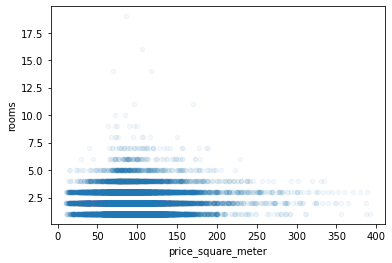

In [61]:
df.plot(x='price_square_meter', y='rooms', kind='scatter', alpha=0.05)

In [62]:
df['price_square_meter'].corr(df['rooms'])

-0.03739597428653035

На основе полученных данных можно сказать, что количество комнат вообще не влияет на стоимость 1 м².

+ **Изучим зависимость цены 1 м² от удалённости от центра.** Построим диаграмму рассеяния для столбцов `price_square_meter` и `city_centers_nearest`. Найдём коэффициент корреляции Пирсона.

<AxesSubplot:xlabel='price_square_meter', ylabel='city_centers_nearest'>

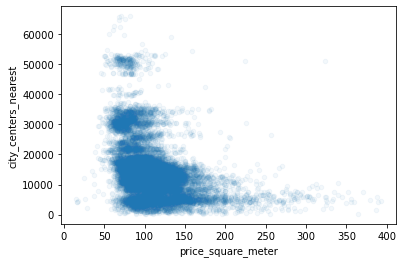

In [63]:
df.plot(x='price_square_meter', y='city_centers_nearest', kind='scatter', alpha=0.05)

In [64]:
df['price_square_meter'].corr(df['city_centers_nearest'])

-0.38692977242080673

На основе полученных данных можно сказать, что удалённость от центра влияет на стоимость 1 м². Также все премиальные квартиры со стоимостью от 200 тысяч за 1 м² находятся в радиусе 10 км от центра города.

+ **Изучим зависимость цены 1 м² от этажа.** Построим диаграмму рассеяния для столбцов `price_square_meter` и `flats_floor`. Найдём коэффициент корреляции Пирсона.

<AxesSubplot:xlabel='price_square_meter', ylabel='flats_floor'>

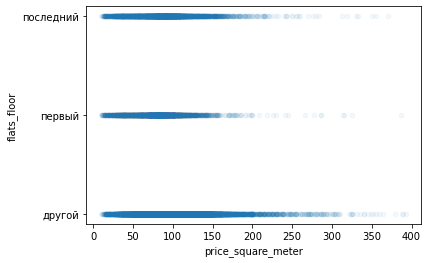

In [65]:
df.plot(x='price_square_meter', y='flats_floor', kind='scatter', alpha=0.05)

In [66]:
df['price_square_meter'].corr(df['city_centers_nearest'])

-0.38692977242080673

На основе полученных данных можно сказать, что этаж влияет на стоимость 1 м². Первый этаж наименее привлекателен, затем последний и лучшие показатели у всех остальных этажей.

+ **Изучим зависимость цены 1 м² от дня, месяца и года размещения объявления.** Построим три диаграммы рассеяния для столбцов `price_square_meter` и `day`, `price_square_meter` и `month`, `price_square_meter` и `year` . Найдём коэффициент корреляции Пирсона.

<AxesSubplot:xlabel='price_square_meter', ylabel='year'>

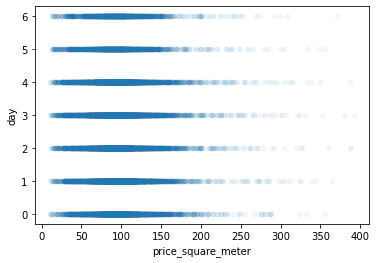

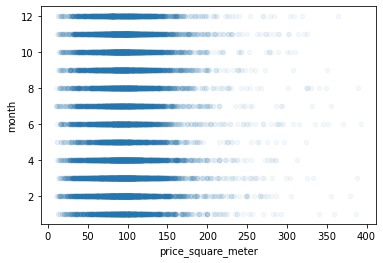

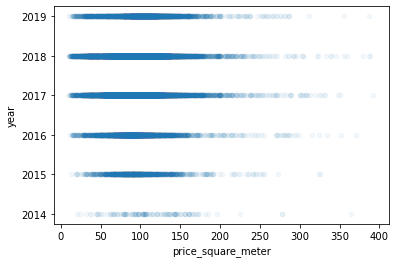

In [67]:
df.plot(x='price_square_meter', y='day', kind='scatter', alpha=0.05)
df.plot(x='price_square_meter', y='month', kind='scatter', alpha=0.05)
df.plot(x='price_square_meter', y='year', kind='scatter', alpha=0.05)

In [68]:
df['price_square_meter'].corr(df['year'])

0.038529156142089675

На основе полученных данных можно сказать, что дата публикации объявления не влияет на стоимость 1 м². Из общей картины выбивается только 2014 год, но это можно списать на малый объём данных, так как сервис Яндекс.Недвижимость запустился только в 2010 году.

+ **Изучим зависимость полной стоимости объектов недвижимости от площади.** Построим три диаграммы рассеяния для столбцов `last_price` и `total_area`, `last_price` и  `ratio_living_to_total_area`, `last_price` и  `ratio_kitchen_to_total_area`. Найдём коэффициенты корреляции Пирсона.

<AxesSubplot:xlabel='last_price', ylabel='ratio_kitchen_to_total_area'>

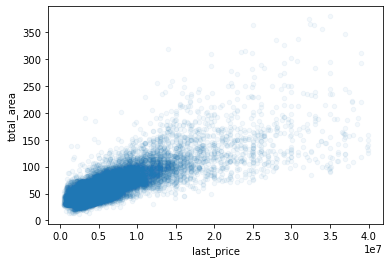

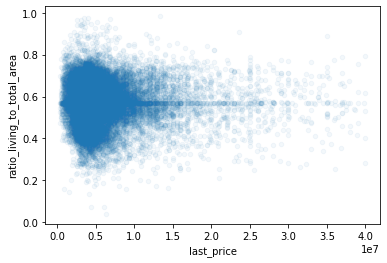

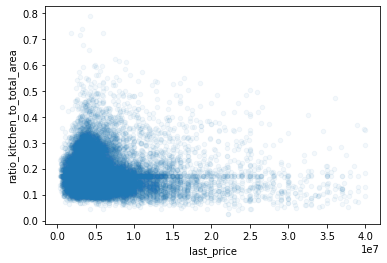

In [69]:
df.plot(x='last_price', y='total_area', kind='scatter', alpha=0.05)
df.plot(x='last_price', y='ratio_living_to_total_area', kind='scatter', alpha=0.05)
df.plot(x='last_price', y='ratio_kitchen_to_total_area', kind='scatter', alpha=0.05)

In [70]:
[
    df['last_price'].corr(df['total_area']),
    df['last_price'].corr(df['ratio_living_to_total_area']),
    df['last_price'].corr(df['ratio_kitchen_to_total_area'])
]

[0.7953075411202746, 0.019193571855604778, -0.11462861896837345]

На основе полученных данных можно сказать, что есть прямая взаимосвязь между общей площадью и полной стоимостью квартиры (что  и так очевидно). Отношение жилой площади или площади кухни к общей не влияет на стоимость.

+ **Изучим зависимость полной стоимости объектов недвижимости от количества комнат.** Построим `bar plot` для столбцов `last_price` и `rooms`. Найдём коэффициент корреляции Пирсона.

<AxesSubplot:xlabel='rooms'>

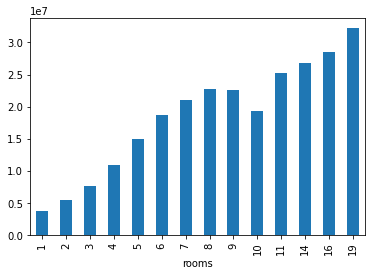

In [71]:
df.groupby('rooms')['last_price'].mean().plot.bar()

In [72]:
df['last_price'].corr(df['rooms'])

0.5235835662080125

С ростом стоимости растёт количество комнат.

+ **Изучим зависимость полной стоимости объектов недвижимости от удалённости от центра.** Построим диаграмму рассеяния для столбцов `last_price` и `city_centers_nearest`. Найдём коэффициент корреляции Пирсона.

<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>

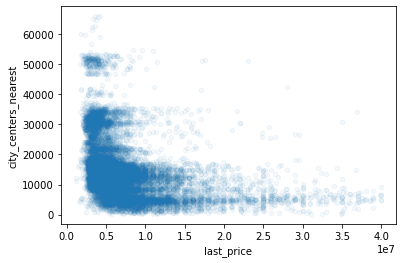

In [73]:
df.plot(x='last_price', y='city_centers_nearest', kind='scatter', alpha=0.05)

In [74]:
df['last_price'].corr(df['city_centers_nearest'])

-0.33923236027216935

На основе полученных данных можно сказать, что удалённость от центра влияет на стоимость. Подавляющее большинство дорогой недвижимости находится в радиусе 10 км от центра города.

+ **Изучим зависимость полной стоимости объектов недвижимости от этажа.** Построим `bar plot` для столбцов `last_price` и `flats_floor`.

<AxesSubplot:xlabel='flats_floor'>

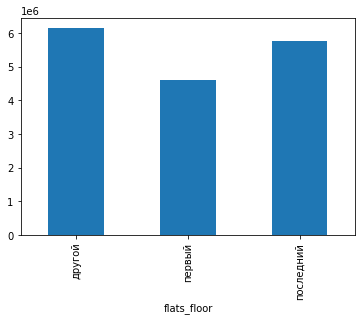

In [75]:
df.groupby('flats_floor')['last_price'].mean().plot.bar()

На основе полученных данных можно сказать, что этаж влияет на стоимость. Самые дешёвые квартиры находятся на первом этаже. Квартиры на последнем этаже лишь немного дешевле квартир на других этажах.

+ **Изучим зависимость полной стоимости объектов недвижимости от дня, месяца и года размещения объявления.** Построим три диаграммы `bar plot` для столбцов `last_price` и `day`, `last_price` и `month`, `last_price` и `year` . Найдём коэффициент корреляции Пирсона.

<AxesSubplot:xlabel='day'>

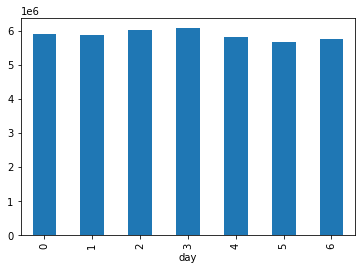

In [76]:
df.groupby('day')['last_price'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

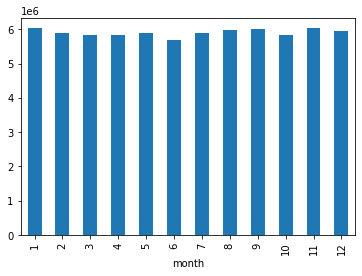

In [77]:
df.groupby('month')['last_price'].mean().plot.bar()

<AxesSubplot:xlabel='year'>

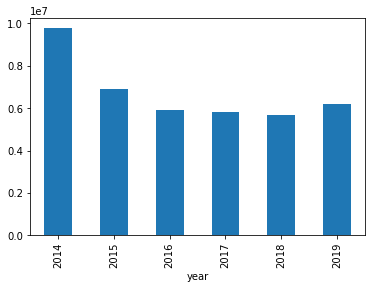

In [78]:
df.groupby('year')['last_price'].mean().plot.bar()

In [79]:
[
    df['last_price'].corr(df['day']),
    df['last_price'].corr(df['month']),
    df['last_price'].corr(df['year'])
]

[-0.012690471179834384, 0.006188398396312344, -0.039447178990266875]

На основе полученных данных можно сказать, что дата публикации объявления не влияет на стоимость. Из общей картины выбивается только 2014 год, но это можно списать на малый объём данных, так как сервис Яндекс.Недвижимость запустился только в 2010 году.

+ **Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра.**

In [80]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15380
посёлок Мурино         494
посёлок Шушары         436
Всеволожск             390
Пушкин                 368
Колпино                338
посёлок Парголово      323
Гатчина                306
деревня Кудрово        283
Выборг                 235
Name: locality_name, dtype: int64

In [81]:
# Создадим список с ТОП-10 городов по количеству объявлений 
ls_of_cities = [
    'Санкт-Петербург',
    'посёлок Мурино',
    'посёлок Шушары',
    'Всеволожск',
    'Пушкин',
    'Колпино',
    'посёлок Парголово',
    'Гатчина',
    'деревня Кудрово',
    'Выборг'
]

# Создадим пустой список, куда будем класть среднюю цену квадратного метра
empty_ls = []
for i in ls_of_cities:
    value_mean = df.query('locality_name == @i')['price_square_meter'].mean()
    value_median = df.query('locality_name == @i')['price_square_meter'].median()
    empty_ls.append([i, value_mean, value_median])
    
# Выведем получившийся список
empty_ls

[['Санкт-Петербург', 111.17993498049404, 104.3],
 ['посёлок Мурино', 85.07348178137647, 84.25],
 ['посёлок Шушары', 78.40642201834858, 76.75],
 ['Всеволожск', 67.2184615384615, 65.8],
 ['Пушкин', 103.10190217391306, 100.0],
 ['Колпино', 75.42426035502953, 74.7],
 ['посёлок Парголово', 90.29009287925697, 91.9],
 ['Гатчина', 68.75751633986928, 67.85],
 ['деревня Кудрово', 92.2989399293286, 91.7],
 ['Выборг', 58.23999999999997, 58.3]]

На основе полученных данных можно сказать, что из топ-10 городов самая низкая стоимость жилья в Выборге, а самая высокая в Санкт-Петербурге.

+ **Выясним, какая область входит в центр**

Так как в столбце `city_centers_nearest` есть пропуски, то создадим новый датафрейм `df_new`, где будут только квартиры в Санкт-Петербурге и без пропусков в столбце `city_centers_nearest`.

In [82]:
condition = (df['city_centers_nearest'].isnull() == False) & (df['locality_name']=='Санкт-Петербург')
df_new = (df.loc[condition]).copy()

Добавим в таблицу `df_new` столбец `to_center_in_kilometers`, в котором будет храниться расстояние до центра в километрах. Также приведём значения этого столбца из типа `float` к типу `int`.

In [83]:
df_new['to_center_in_kilometers'] = (df_new['city_centers_nearest']/1000).astype(int)

Построим сводную таблицу по `df_new`. Посчитаем среднюю и медианную стоимость за 1 м² для каждого километра.

In [84]:
df_new.pivot_table(index=['to_center_in_kilometers'], values=['price_square_meter'], aggfunc=['mean', 'median'])

,mean,median
,price_square_meter,price_square_meter
to_center_in_kilometers,,
0,138.662857,127.90
1,133.261818,118.85
2,121.784859,111.90
3,120.370276,109.65
4,132.760502,125.00
5,134.056346,123.00
6,136.625576,129.10
7,130.327461,123.50


Построим диаграмму рассеяния для столбцов `price_square_meter` и `to_center_in_kilometers`. Найдём коэффициент корреляции Пирсона.

<AxesSubplot:xlabel='price_square_meter', ylabel='to_center_in_kilometers'>

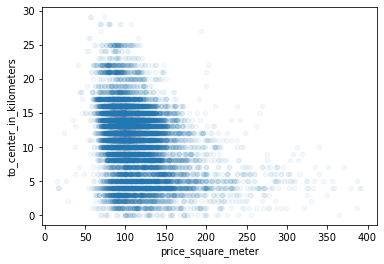

In [85]:
df_new.plot(x='price_square_meter', y='to_center_in_kilometers', kind='scatter', alpha=0.05)

In [86]:
df_new['price_square_meter'].corr(df_new['to_center_in_kilometers'])

-0.3449617444213858

По сводной таблице видно, что стоимость за 1 м² сильно падает после 7 километра. На диаграмме рассеяния видно, что это происходит потому, что почти все квартиры стоимостью более 200 тысяч за 1 м² находятся в диапазоне от 0 до 7 километров. Таким образом центром города можно считать область радиусом в 7 километров.

+ **Изучим такие параметры как площадь, цена, количество комнат и высота потолков для объектов недвижимости в центре города.**

Выделим сегмент квартир находящихся в радиусе 7 километров от центра города и помести их в таблицу `df_center`.

In [87]:
df_center = df_new.query('to_center_in_kilometers<=7')

+ **Изучим площадь объектов недвижимости в центре города.** Построим гистограммы и используем метод `describe()` для столбцов `total_area`, `ratio_living_to_total_area` и `ratio_kitchen_to_total_area`

In [88]:
[
    'Общая площадь',
    df_center['total_area'].describe(),
    'Отношение жилой площади к общей',
    df_center['ratio_living_to_total_area'].describe(),
    'Отношение площади кухни к общей',
    df_center['ratio_kitchen_to_total_area'].describe(),
]

['Общая площадь',
 count    3495.000000
 mean       84.855637
 std        42.941446
 min        12.000000
 25%        55.000000
 50%        75.500000
 75%       102.500000
 max       374.600000
 Name: total_area, dtype: float64,
 'Отношение жилой площади к общей',
 count    3495.000000
 mean        0.579894
 std         0.109546
 min         0.038462
 25%         0.521398
 50%         0.583333
 75%         0.657400
 max         0.983447
 Name: ratio_living_to_total_area, dtype: float64,
 'Отношение площади кухни к общей',
 count    3495.000000
 mean        0.174267
 std         0.077869
 min         0.025381
 25%         0.121853
 50%         0.160000
 75%         0.200000
 max         0.625000
 Name: ratio_kitchen_to_total_area, dtype: float64]

<AxesSubplot:>

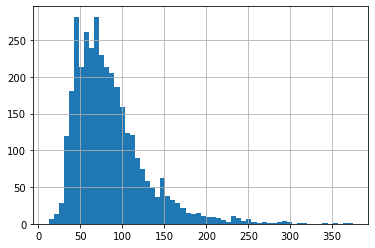

In [89]:
df_center['total_area'].hist(bins=60)

<AxesSubplot:>

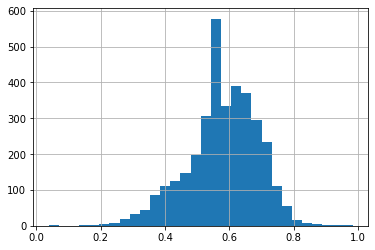

In [90]:
df_center['ratio_living_to_total_area'].hist(bins=30)

<AxesSubplot:>

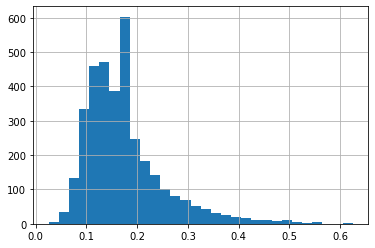

In [91]:
df_center['ratio_kitchen_to_total_area'].hist(bins=30)

Гистограммы площади для квартир в центре города идентичны гистограммам для квартир из общей выборки. Единственное отличие, что в центре больший процент квартир с площадью от 75 до 100 м².

+ **Изучим стоимость 1 м² объектов недвижимости в центре города.** Построим гистограмму и используем метод `describe()` для столбца `price_square_meter`

In [92]:
df_center['price_square_meter'].describe()

count    3495.000000
mean      130.694564
std        46.629427
min        15.300000
25%        99.300000
50%       121.000000
75%       149.500000
max       392.400000
Name: price_square_meter, dtype: float64

<AxesSubplot:>

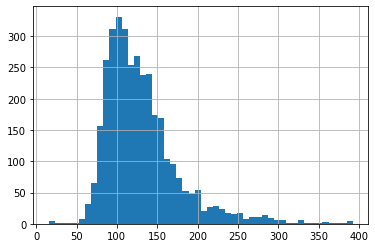

In [93]:
df_center['price_square_meter'].hist(bins=50)

В отличии от гистограммы для квартир из общей выборки, гистограмма для квартир в центре города тяготеет к форме распределения Пуассона. Средняя стоимость за 1 м² квартир в центре выше на 30-35%.

+ **Изучим количество комнат для квартир в центре города.** Построим гистограмму и используем метод `describe()` для столбца `rooms`

In [94]:
df_center['rooms'].describe()

count    3495.000000
mean        2.746209
std         1.373755
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

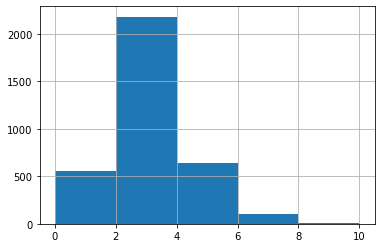

In [95]:
df_center['rooms'].hist(bins=5, range=(0, 10))

В общей выборке среднестатистической квартирой считались двушки. Для центра города это уже трёшки.

+ **Изучим высоту потолков для квартир в центре города.** Построим гистограмму и используем метод `describe()` для столбца `ceiling_height`

In [96]:
df_center['ceiling_height'].describe()

count    3495.000000
mean        2.949402
std         0.327996
min         2.400000
25%         2.700000
50%         3.000000
75%         3.100000
max         4.800000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

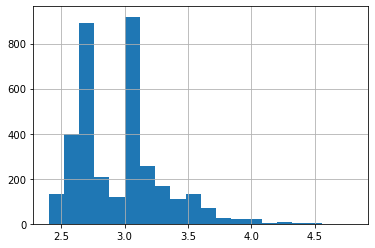

In [97]:
df_center['ceiling_height'].hist(bins=20)

Почти во всех квартирах в центре города либо обычные нормальные потолки либо потолки от 3 метров.

+ **Изучим зависимость цены 1 м² от количества комнат для квартир в центре города.** Построим диаграмму рассеяния для столбцов `price_square_meter` и `rooms`. Найдём коэффициент корреляции Пирсона.

<AxesSubplot:xlabel='price_square_meter', ylabel='rooms'>

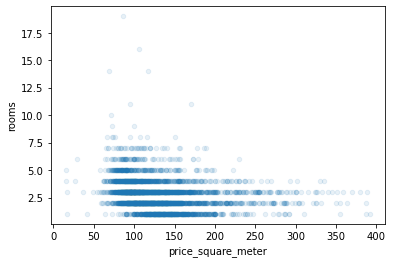

In [98]:
df_center.plot(x='price_square_meter', y='rooms', kind='scatter', alpha=0.1)

In [99]:
df_center['price_square_meter'].corr(df['rooms'])

-0.22913859984423132

Коэффициент корреляции Пирсона говорит, что зависимости почти нет. Диаграмма рассеяния схожа с диаграммой для квартир из общей выборки. И там и там самые дорогие квартиры имеют обычное количество комнат.

+ **Изучим зависимость цены 1 м² от этажа для квартир в центре города.** Построим диаграмму рассеяния для столбцов `price_square_meter` и `flats_floor`.

<AxesSubplot:xlabel='price_square_meter', ylabel='flats_floor'>

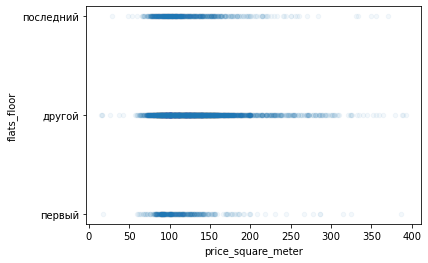

In [100]:
df_center.plot(x='price_square_meter', y='flats_floor', kind='scatter', alpha=0.05)

По диаграмме рассеяния видно, что дорогих квартир гораздо больше на других этажах, нежели на перов или последнем.

+ **Изучим зависимость цены 1 м² от удалённости от центра города для квартир в центре города.** Построим диаграмму рассеяния для столбцов `price_square_meter` и `to_center_in_kilometers`. Найдём коэффициент корреляции Пирсона.

<AxesSubplot:xlabel='price_square_meter', ylabel='to_center_in_kilometers'>

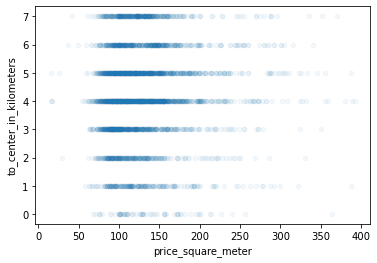

In [101]:
df_center.plot(x='price_square_meter', y='to_center_in_kilometers', kind='scatter', alpha=0.05)

In [102]:
df_center['price_square_meter'].corr(df_new['to_center_in_kilometers'])

0.04780114774612777

На основе полученных данных можно сказать, что зависимости нет. Центр есть центр.

+ **Изучим зависимость цены 1 м² от дня, месяца и года размещения объявления для квартир в центре города.** Построим три диаграммы рассеяния для столбцов `price_square_meter` и `day`, `price_square_meter` и `month`, `price_square_meter` и `year` . Найдём коэффициент корреляции Пирсона.

<AxesSubplot:xlabel='price_square_meter', ylabel='year'>

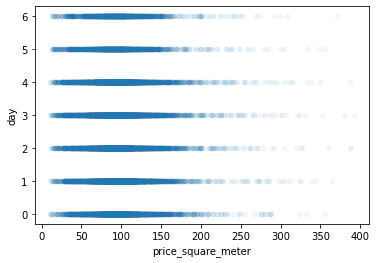

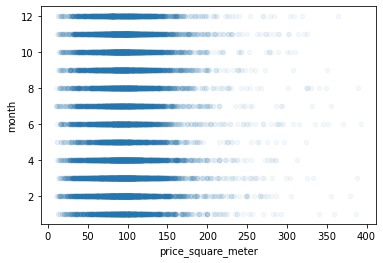

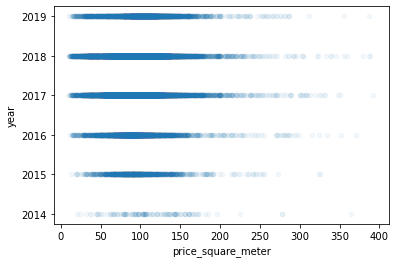

In [103]:
df.plot(x='price_square_meter', y='day', kind='scatter', alpha=0.05)
df.plot(x='price_square_meter', y='month', kind='scatter', alpha=0.05)
df.plot(x='price_square_meter', y='year', kind='scatter', alpha=0.05)

In [104]:
df['price_square_meter'].corr(df['year'])

0.038529156142089675

Показатели абсолютно идентичны квартирам из общей выборки. Также выбивается 2014 год. Дата публикации объявления для центра города также не влияет на стоимость 1 м².

+ **Изучим зависимость полной стоимости от количества комнат для недвижимости в центре города.** Построим `bar plot` для столбцов `last_price` и `rooms`. Найдём коэффициент корреляции Пирсона.

<AxesSubplot:xlabel='rooms'>

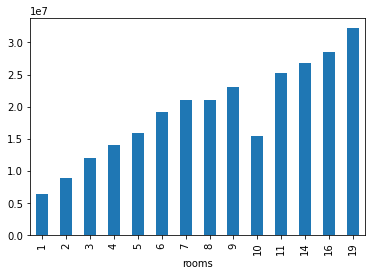

In [105]:
df_center.groupby('rooms')['last_price'].mean().plot.bar()

In [106]:
df_center['last_price'].corr(df_center['rooms'])

0.4742427784733816

С ростом стоимости растёт количество комнат как для общей выборки, так и для центра города.

+ **Изучим зависимость полной стоимости от этажа для недвижимости в центре города.** Построим `bar plot` для столбцов `last_price` и `flats_floor`.

<AxesSubplot:xlabel='flats_floor'>

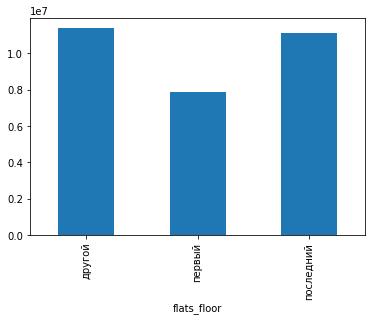

In [107]:
df_center.groupby('flats_floor')['last_price'].mean().plot.bar()

Первый этаж, также как и для квартир из общей выборки наименее привлекателен. Однако квартиры на последнем этаже сравнялись по стоимости с остальными в отличии от общей выборки.

+ **Изучим зависимость полной стоимости от удалённости от центра города для недвижимости в центре города.** Построим `bar plot` для столбцов `last_price` и `to_center_in_kilometers`. Найдём коэффициент корреляции Пирсона.

<AxesSubplot:xlabel='to_center_in_kilometers'>

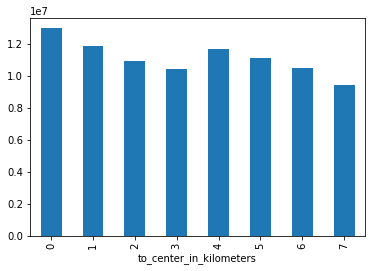

In [108]:
df_center.groupby('to_center_in_kilometers')['last_price'].mean().plot.bar()

In [109]:
df_center['last_price'].corr(df_center['to_center_in_kilometers'])

-0.07161198590485472

Квартиры дорожают по мере приближения к 0 километру, но незначительно.

+ **Изучим зависимость полной стоимости от дня, месяца и года размещения объявления для недвижимости в центре города.** Построим три диаграммы `bar plot` для столбцов `last_price` и `day`, `last_price` и `month`, `last_price` и `year` . Найдём коэффициенты корреляции Пирсона.

<AxesSubplot:xlabel='day'>

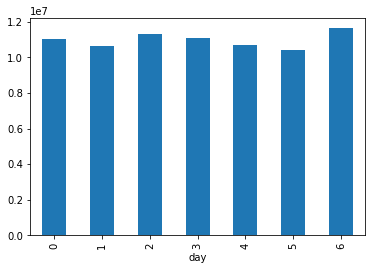

In [110]:
df_center.groupby('day')['last_price'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

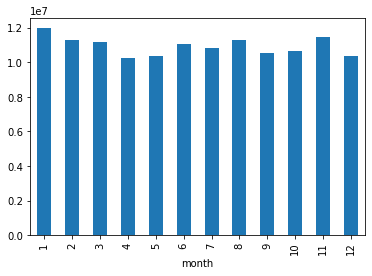

In [111]:
df_center.groupby('month')['last_price'].mean().plot.bar()

<AxesSubplot:xlabel='year'>

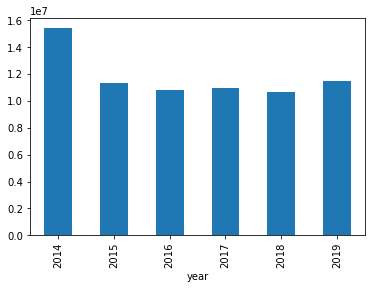

In [112]:
df_center.groupby('year')['last_price'].mean().plot.bar()

In [113]:
[
    df_center['last_price'].corr(df_center['day']),
    df_center['last_price'].corr(df_center['month']),
    df_center['last_price'].corr(df_center['year'])
]

[0.000528675607550328, -0.022354366439056448, -0.012762030305442339]

На основе полученных данных можно сказать, что дата публикации объявления не влияет на стоимость. Из общей картины выбивается только 2014 год, но это можно списать на малый объём данных, так как сервис Яндекс.Недвижимость запустился только в 2010 году.

## Общий вывод

+ Подавляющее большинство квартир имеют площадь от 25 до 100 м².
+ Кухня обычно занимает от 10% до 20% общей площади.
+ Жилая площадь обычно занимает от 40% до 70% общей площади.
+ Стоимость в среднем колеблется от 50 до 140 тысяч за квадратный метр, а если это центр города, то от 75 до 160 тысяч за квадратный метр.
+ Высокие потолки от 3 метров и более свойственны квартирам в центре города.
+ Центр города - это область радиусом в 7 километров.
+ Продать квартиру быстро, означает продать меньше чем за 3 месяца.
+ Если вы продаёте квартиру на 1 этаже, будьте готовы к ожиданию дольше обычного.
+ Квартиры продаются одинаково в любое время года.